In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [9]:
#Data Downloading
ticker = 'AAPL'
df = yf.download(ticker, start = '2020-01-01', end = '2024-12-31')
df = df[['Close']].copy()
df.columns = ['price']

C:\Users\Alqama\AppData\Local\Temp\ipykernel_9984\1893235483.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start = '2020-01-01', end = '2024-12-31')
[*********************100%***********************]  1 of 1 completed


In [11]:
#ceating momentum for 50 days window
window = 50
df['ma'] = df['price'].rolling(window).mean()

# Buy if price > MA, Sell if price < MA
df['position'] = np.where(df['price'] > df['ma'], 1, -1)
df['returns'] = df['price'].pct_change()
df['strategy'] = df['position'].shift(1) * df['returns']
df.dropna(inplace=True)

In [14]:
# performance calculation
initial_cash = 100_000
df['equity_curve'] = initial_cash * (1 + df['strategy']).cumprod()
df['buy_hold'] = initial_cash * (1 + df['returns']).cumprod()

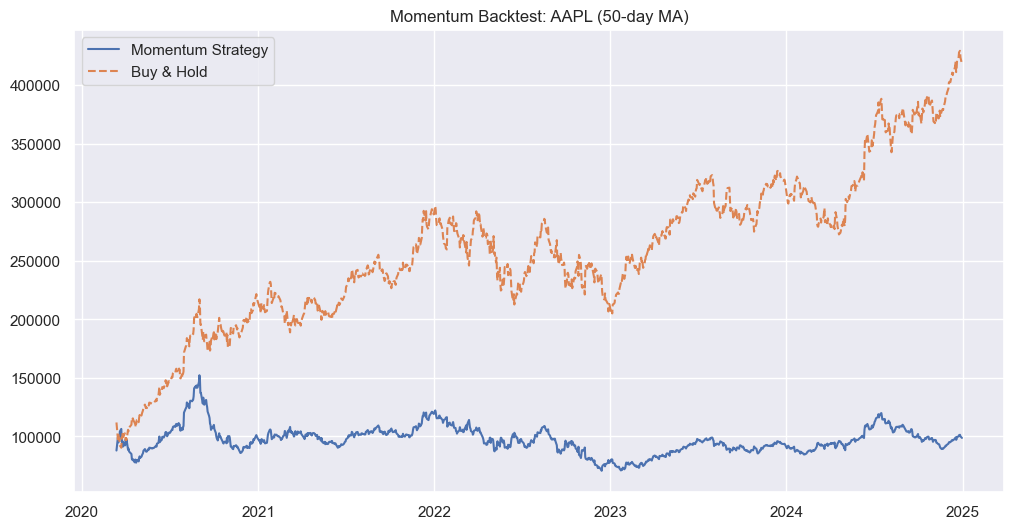

In [16]:
# plot
plt.figure(figsize=(12, 6))
plt.plot(df['equity_curve'], label='Momentum Strategy')
plt.plot(df['buy_hold'], label='Buy & Hold', linestyle='--')
plt.title(f'Momentum Backtest: {ticker} ({window}-day MA)')
plt.legend()
plt.show()

In [26]:
# average moving window optimization
def momentum_backtest(ticker, start, end, window):
    df = yf.download(ticker, start=start, end=end)[['Close']].copy()
    df.columns = ['price']
    df['ma'] = df['price'].rolling(window).mean()
    df['position'] = np.where(df['price'] > df['ma'], 1, -1)
    df['returns'] = df['price'].pct_change()
    df['strategy'] = df['position'].shift(1) * df['returns']
    df.dropna(inplace=True)
    equity = 100_000 * (1 + df['strategy']).cumprod()
    return equity.iloc[-1]  # Final portfolio value

C:\Users\Alqama\AppData\Local\Temp\ipykernel_9984\2093732342.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)[['Close']].copy()
[*********************100%***********************]  1 of 1 completed
C:\Users\Alqama\AppData\Local\Temp\ipykernel_9984\2093732342.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)[['Close']].copy()
[*********************100%***********************]  1 of 1 completed
C:\Users\Alqama\AppData\Local\Temp\ipykernel_9984\2093732342.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)[['Close']].copy()
[*********************100%***********************]  1 of 1 completed
C:\Users\Alqama\AppData\Local\Temp\ipykernel_9984\2093732342.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.do

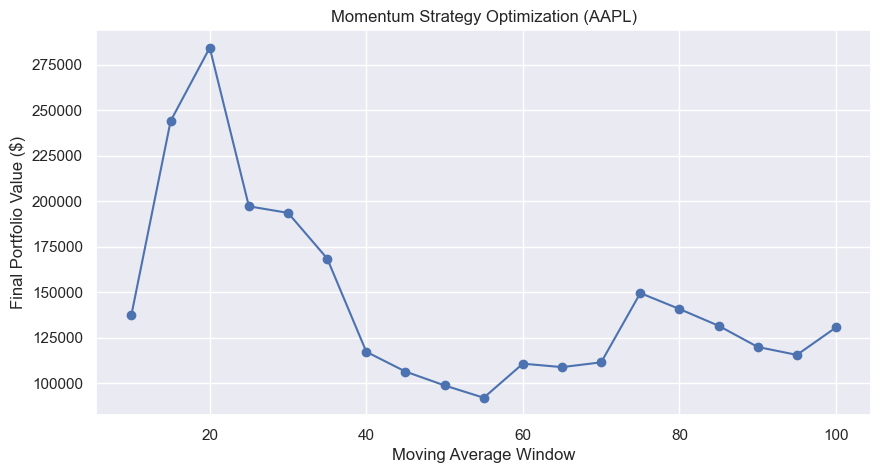

In [24]:
windows = range(10, 101, 5)
results = [momentum_backtest('AAPL', '2020-01-01', '2024-12-31', w) for w in windows]

plt.figure(figsize=(10, 5))
plt.plot(windows, results, marker='o')
plt.title("Momentum Strategy Optimization (AAPL)")
plt.xlabel("Moving Average Window")
plt.ylabel("Final Portfolio Value ($)")
plt.grid(True)
plt.show()

C:\Users\Alqama\AppData\Local\Temp\ipykernel_9984\2093732342.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)[['Close']].copy()
[*********************100%***********************]  1 of 1 completed
C:\Users\Alqama\AppData\Local\Temp\ipykernel_9984\2093732342.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)[['Close']].copy()
[*********************100%***********************]  1 of 1 completed
C:\Users\Alqama\AppData\Local\Temp\ipykernel_9984\2093732342.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)[['Close']].copy()
[*********************100%***********************]  1 of 1 completed
C:\Users\Alqama\AppData\Local\Temp\ipykernel_9984\2093732342.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.do

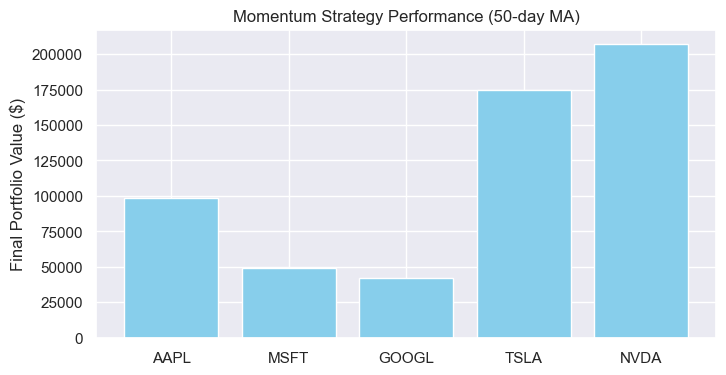

In [28]:
# Comparison Across Multiple Stocks
tickers = ['AAPL', 'MSFT', 'GOOGL', 'TSLA', 'NVDA']
final_values = {}

for t in tickers:
    val = momentum_backtest(t, '2020-01-01', '2024-12-31', window=50)
    final_values[t] = val

plt.figure(figsize=(8, 4))
plt.bar(final_values.keys(), final_values.values(), color='skyblue')
plt.title("Momentum Strategy Performance (50-day MA)")
plt.ylabel("Final Portfolio Value ($)")
plt.show()

In [48]:
# Add Transaction Cost Simulation feature
def momentum_backtest(ticker, start, end, window, cost=0.001):
    df = yf.download(ticker, start=start, end=end)[['Close']].copy()
    df.columns = ['price']
    df['ma'] = df['price'].rolling(window).mean()
    df['position'] = np.where(df['price'] > df['ma'], 1, -1)
    df['returns'] = df['price'].pct_change()
    df['strategy'] = df['position'].shift(1) * df['returns']
    df['trades'] = df['position'].diff().abs()
    cost = 0.001  # 0.1%
    df['strategy_net'] = df['strategy'] - cost * df['trades']
    equity_net = 100_000 * (1 + df['strategy_net']).cumprod()
    return equity_net.iloc[-1]

In [60]:
class MomentumStrategy:
    def __init__(self, window=50):
        self.window = window

    def generate_signals(self, df):
        df['ma'] = df['price'].rolling(self.window).mean()
        df['position'] = np.where(df['price'] > df['ma'], 1, -1)
        return df

In [62]:
def apply_stop_loss(df, stop_loss_pct=0.02):
    equity = [100_000]
    position, entry_price = 0, None
    for i in range(1, len(df)):
        if df['position'].iloc[i] != position:
            position = df['position'].iloc[i]
            entry_price = df['price'].iloc[i]
        price = df['price'].iloc[i]
        if position != 0 and entry_price:
            pnl = (price - entry_price) / entry_price * position
            if pnl < -stop_loss_pct:
                position = 0
        equity.append(equity[-1] * (1 + df['returns'].iloc[i] * position))
    df['equity_curve_sl'] = equity
    return df

In [64]:
def apply_drawdown_limit(df, max_drawdown=0.1):
    eq = 100_000 * (1 + df['strategy']).cumprod()
    peak = eq.cummax()
    dd = (eq - peak) / peak
    df['equity_curve_dd'] = 100_000 * (1 + df['strategy'].where(dd >= -max_drawdown, 0)).cumprod()
    return df

In [66]:
def apply_position_sizing(df, risk_pct=0.02):
    df['scaled_strategy'] = df['position'].shift(1) * df['returns'] * risk_pct
    df['equity_curve_ps'] = 100_000 * (1 + df['scaled_strategy']).cumprod()
    return df

In [72]:
def run_backtest(ticker, strategy, risk_sl=0.02, risk_dd=0.1, risk_ps=0.02):
    df = yf.download(ticker, '2020-01-01', '2024-12-31')[['Close']].copy()
    df.columns = ['price']
    df.dropna(inplace=True)
    df = strategy.generate_signals(df)
    df['returns'] = df['price'].pct_change()
    df['strategy'] = df['position'].shift(1) * df['returns']
    df.dropna(inplace=True)
    df = apply_stop_loss(df, stop_loss_pct=risk_sl)
    df = apply_drawdown_limit(df, max_drawdown=risk_dd)
    df = apply_position_sizing(df, risk_pct=risk_ps)
    return df

C:\Users\Alqama\AppData\Local\Temp\ipykernel_9984\1765606649.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, '2020-01-01', '2024-12-31')[['Close']].copy()
[*********************100%***********************]  1 of 1 completed


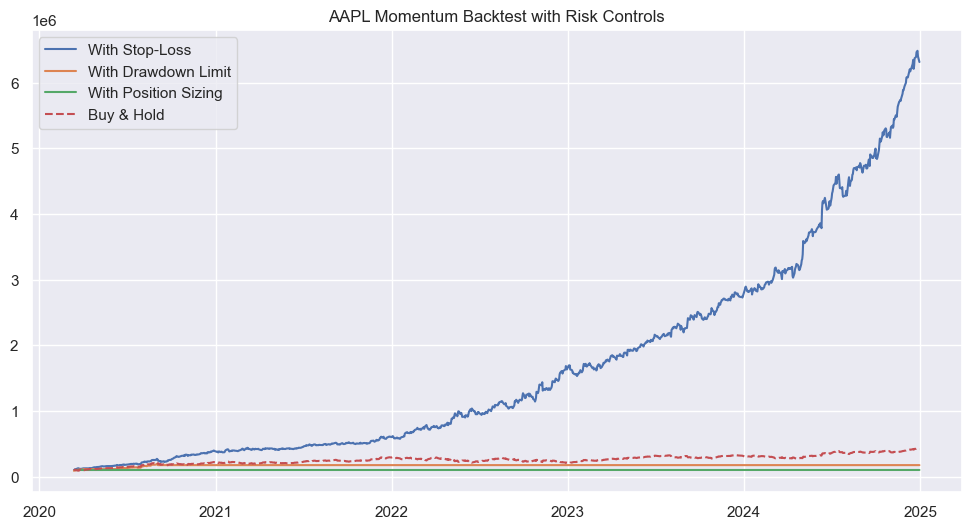

In [74]:
strategy = MomentumStrategy(window=50)
df = run_backtest('AAPL', strategy)

plt.figure(figsize=(12, 6))
plt.plot(df['equity_curve_sl'], label='With Stop-Loss')
plt.plot(df['equity_curve_dd'], label='With Drawdown Limit')
plt.plot(df['equity_curve_ps'], label='With Position Sizing')
plt.plot(100_000 * (1 + df['returns']).cumprod(), '--', label='Buy & Hold')
plt.title('AAPL Momentum Backtest with Risk Controls')
plt.legend()
plt.show()